Домашнее задание по теме «Линейная регрессия»

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # шкалирование данных, нормализация

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression # Импортируем класс LinearRegression из sklearn.linear_model для реализации линейной регрессии
from sklearn.metrics import root_mean_squared_error, r2_score

Загружаем данные

In [297]:
import pandas as pd 

test_df=pd.read_csv('test.csv', index_col='id')
train_df=pd.read_csv('train.csv', index_col='id')

In [298]:
test_df.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
id,,,,,,,,,,,,,,,
360336,7.24,4.00,1.00,0.00,2.00,10.80,0.00,1.00,7.00,"20,319.00",0.00,0.00,0.00,0.00,0.00
360337,6.90,2.00,2.00,2.00,3.00,8.51,1.00,0.00,4.00,"33,858.00",1.00,0.00,1.00,1.00,1.00
360338,8.34,3.00,0.00,0.00,3.00,8.77,0.00,1.00,14.00,"39,696.00",0.00,0.00,1.00,1.00,0.00
360339,5.48,2.00,3.00,3.00,2.00,21.90,1.00,0.00,9.00,"23,688.00",1.00,1.00,1.00,1.00,1.00
360340,4.80,3.00,2.00,0.00,2.00,10.90,1.00,0.00,11.00,"27,694.00",1.00,1.00,1.00,1.00,1.00


In [299]:
train_df.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
id,,,,,,,,,,,,,,,,
0,8.61,3.00,2.00,2.00,2.00,10.30,1.00,0.00,32.00,"36,509.00",0.00,0.00,0.00,0.00,0.00,62.09
1,5.00,2.00,4.00,0.00,3.00,6.66,1.00,0.00,1.00,"28,206.00",1.00,0.00,0.00,0.00,0.00,121.80
2,14.08,4.00,0.00,0.00,3.00,21.30,1.00,0.00,26.00,"21,215.00",1.00,0.00,0.00,0.00,0.00,83.51
3,4.02,3.00,5.00,0.00,0.00,14.80,0.00,1.00,36.00,"21,215.00",1.00,0.00,0.00,0.00,0.00,66.78
4,2.13,3.00,5.00,0.00,3.00,17.00,1.00,1.00,20.00,"27,694.00",1.00,1.00,1.00,1.00,1.00,111.51


In [300]:
test_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Index: 240224 entries, 360336 to 600559
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    240224 non-null  float64
 1   unit_sales(in millions)     240224 non-null  float64
 2   total_children              240224 non-null  float64
 3   num_children_at_home        240224 non-null  float64
 4   avg_cars_at home(approx).1  240224 non-null  float64
 5   gross_weight                240224 non-null  float64
 6   recyclable_package          240224 non-null  float64
 7   low_fat                     240224 non-null  float64
 8   units_per_case              240224 non-null  float64
 9   store_sqft                  240224 non-null  float64
 10  coffee_bar                  240224 non-null  float64
 11  video_store                 240224 non-null  float64
 12  salad_bar                   240224 non-null  float64
 13  prepared_food 

In [301]:
train_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Index: 360336 entries, 0 to 360335
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    360336 non-null  float64
 1   unit_sales(in millions)     360336 non-null  float64
 2   total_children              360336 non-null  float64
 3   num_children_at_home        360336 non-null  float64
 4   avg_cars_at home(approx).1  360336 non-null  float64
 5   gross_weight                360336 non-null  float64
 6   recyclable_package          360336 non-null  float64
 7   low_fat                     360336 non-null  float64
 8   units_per_case              360336 non-null  float64
 9   store_sqft                  360336 non-null  float64
 10  coffee_bar                  360336 non-null  float64
 11  video_store                 360336 non-null  float64
 12  salad_bar                   360336 non-null  float64
 13  prepared_food      

# EDA

In [302]:
#Подсчитываем сколько процентов незаполнено столбце
percent_missing = train_df.isnull().sum() * 100 / len(train_df.index)
missing_value_df = pd.DataFrame({'Незаполнено столбце %': percent_missing})

missing_value_df

,Незаполнено столбце %
store_sales(in millions),0.00
unit_sales(in millions),0.00
total_children,0.00
num_children_at_home,0.00
avg_cars_at home(approx).1,0.00
gross_weight,0.00
recyclable_package,0.00
low_fat,0.00
units_per_case,0.00
store_sqft,0.00


Нет пропусков

In [303]:
#Находим максимальные и минимальные значения
min_max_df = pd.DataFrame({'Максимальное значение': train_df.max(), 'Минимальное значение': train_df.min()})

min_max_df

,Максимальное значение,Минимальное значение
store_sales(in millions),22.92,0.51
unit_sales(in millions),6.00,1.00
total_children,5.00,0.00
num_children_at_home,5.00,0.00
avg_cars_at home(approx).1,4.00,0.00
gross_weight,21.90,6.00
recyclable_package,1.00,0.00
low_fat,1.00,0.00
units_per_case,36.00,1.00
store_sqft,"39,696.00","20,319.00"


In [304]:
#Находим средние значения
mean_df = pd.DataFrame({'Среднее значение': train_df.mean()})

mean_df

,Среднее значение
store_sales(in millions),6.34
unit_sales(in millions),3.04
total_children,2.46
num_children_at_home,0.69
avg_cars_at home(approx).1,2.20
gross_weight,13.82
recyclable_package,0.57
low_fat,0.33
units_per_case,18.97
store_sqft,"28,180.33"


In [305]:
#Находим медиану
median_df = pd.DataFrame({'Медиана': train_df.median()})

median_df

,Медиана
store_sales(in millions),5.78
unit_sales(in millions),3.00
total_children,2.00
num_children_at_home,0.00
avg_cars_at home(approx).1,2.00
gross_weight,13.60
recyclable_package,1.00
low_fat,0.00
units_per_case,20.00
store_sqft,"27,694.00"


In [306]:
#Находим дисперсию
pd.options.display.float_format = '{:,.2f}'.format
var_df = pd.DataFrame({'Диспрерсия': train_df.var()})

var_df

,Диспрерсия
store_sales(in millions),10.94
unit_sales(in millions),0.62
total_children,2.22
num_children_at_home,1.48
avg_cars_at home(approx).1,1.18
gross_weight,21.30
recyclable_package,0.25
low_fat,0.22
units_per_case,104.30
store_sqft,"35,627,457.71"


In [307]:
#Находим квантиль 0.1 и 0.9
quantile_df = pd.DataFrame({'Квантиль 0.1': train_df.quantile(0.1), 'Квантиль 0.9': train_df.quantile(0.9)})

quantile_df

,Квантиль 0.1,Квантиль 0.9
store_sales(in millions),2.32,11.04
unit_sales(in millions),2.00,4.00
total_children,0.00,4.00
num_children_at_home,0.00,3.00
avg_cars_at home(approx).1,1.00,4.00
gross_weight,7.71,20.30
recyclable_package,0.00,1.00
low_fat,0.00,1.00
units_per_case,5.00,33.00
store_sqft,"21,215.00","38,382.00"


In [308]:
#Находим квартиль 1 и 3
quartile_df = pd.DataFrame({'Квартиль 1': train_df.quantile(0.25), 'Квартиль 3': train_df.quantile(0.75)})

quartile_df

,Квартиль 1,Квартиль 3
store_sales(in millions),3.72,8.40
unit_sales(in millions),3.00,4.00
total_children,1.00,4.00
num_children_at_home,0.00,1.00
avg_cars_at home(approx).1,1.00,3.00
gross_weight,9.71,17.70
recyclable_package,0.00,1.00
low_fat,0.00,1.00
units_per_case,10.00,28.00
store_sqft,"23,593.00","33,858.00"


# Подготовка датасета

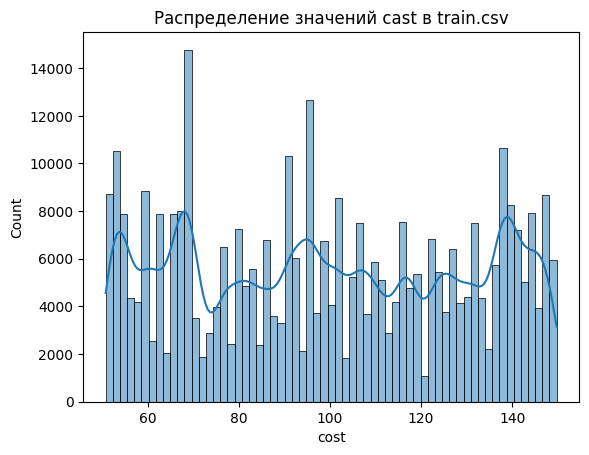

In [309]:
sns.histplot(train_df['cost'], kde=True)
plt.title("Распределение значений cast в train.csv")
plt.show()

In [310]:
# посчитаем квантили распределения
train_df['cost'].describe(percentiles=[0.1, 0.25, 0.75, 0.95 ])

count   360,336.00
mean         99.61
std          29.94
min          50.79
10%          59.19
25%          70.32
50%          98.81
75%         126.62
95%         145.41
max         149.75
Name: cost, dtype: float64

Нет больших скачков в расспределении. Будем считать, что нет выбросов

Из анализа выше мы видели, что в данных нет пропусков

In [311]:
missing_value_df

,Незаполнено столбце %
store_sales(in millions),0.00
unit_sales(in millions),0.00
total_children,0.00
num_children_at_home,0.00
avg_cars_at home(approx).1,0.00
gross_weight,0.00
recyclable_package,0.00
low_fat,0.00
units_per_case,0.00
store_sqft,0.00


Обработка выбросов:

In [312]:
train_df.describe(include='all')

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,"360,336.00","360,336.00","360,336.00","360,336.00","360,336.00","360,336.00","360,336.00","360,336.00","360,336.00","360,336.00","360,336.00","360,336.00","360,336.00","360,336.00","360,336.00","360,336.00"
mean,6.34,3.04,2.46,0.69,2.20,13.82,0.57,0.33,18.97,"28,180.33",0.56,0.28,0.50,0.50,0.50,99.61
std,3.31,0.78,1.49,1.21,1.08,4.61,0.50,0.47,10.21,"5,968.87",0.50,0.45,0.50,0.50,0.50,29.94
min,0.51,1.00,0.00,0.00,0.00,6.00,0.00,0.00,1.00,"20,319.00",0.00,0.00,0.00,0.00,0.00,50.79
25%,3.72,3.00,1.00,0.00,1.00,9.71,0.00,0.00,10.00,"23,593.00",0.00,0.00,0.00,0.00,0.00,70.32
50%,5.78,3.00,2.00,0.00,2.00,13.60,1.00,0.00,20.00,"27,694.00",1.00,0.00,1.00,1.00,1.00,98.81
75%,8.40,4.00,4.00,1.00,3.00,17.70,1.00,1.00,28.00,"33,858.00",1.00,1.00,1.00,1.00,1.00,126.62
max,22.92,6.00,5.00,5.00,4.00,21.90,1.00,1.00,36.00,"39,696.00",1.00,1.00,1.00,1.00,1.00,149.75


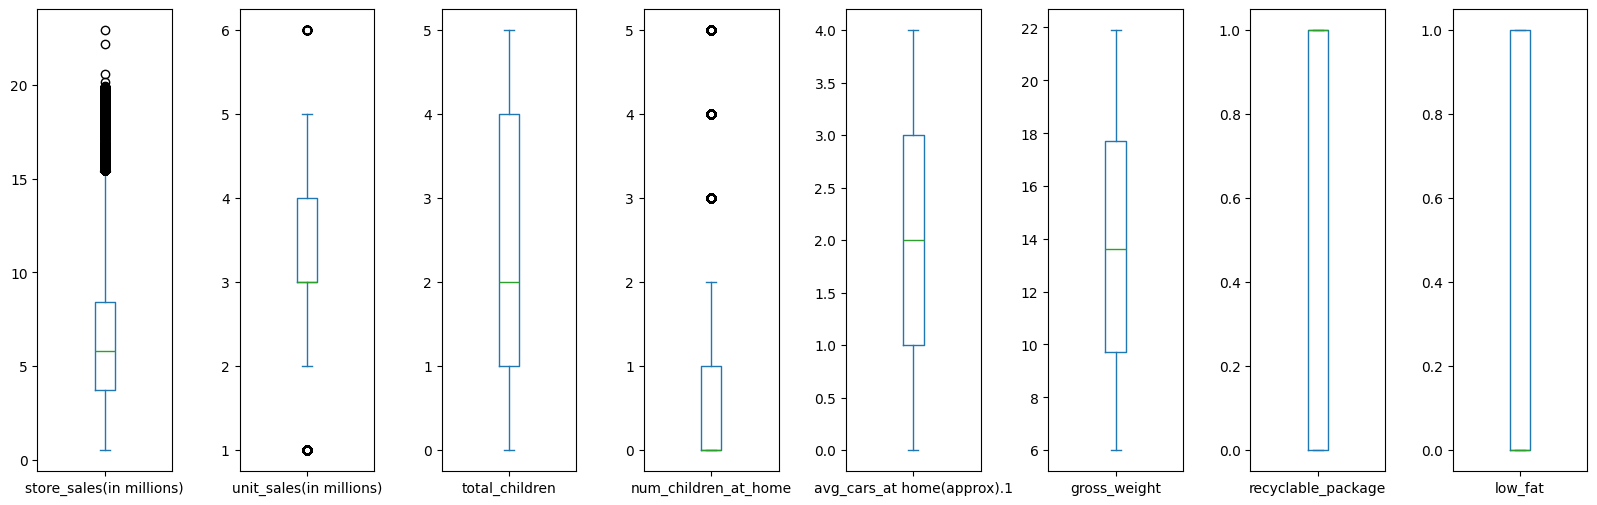

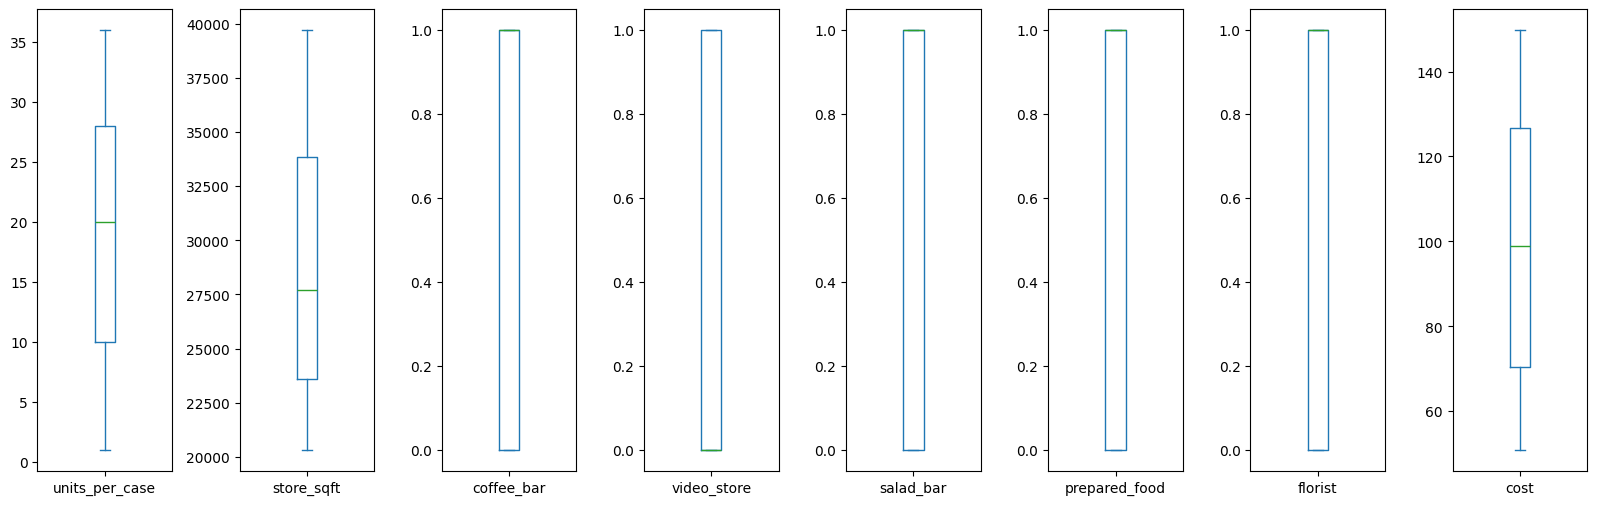

In [313]:
train_df.iloc[:,:train_df.shape[1]//2].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize= (20,6)
)
plt.subplots_adjust(wspace=0.5)
train_df.iloc[:,train_df.shape[1]//2:].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize= (20,6)
)
plt.subplots_adjust(wspace=0.5)
plt.show()

Можно заметить у столбцов store_sales, unit_sales и num_children_at_home есть выбросы. Нужно избавиться от них.

In [314]:
def RemoveOutliers(df, column):
    # убираем выбросы
    Q3 = np.quantile(df[column], 0.75, axis=0)
    Q1 = np.quantile(df[column], 0.25, axis=0)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    return np.where((df[column] > upper) | 
                    (df[column] < lower), 
                    df[column].median(), 
                    df[column])

<Axes: >

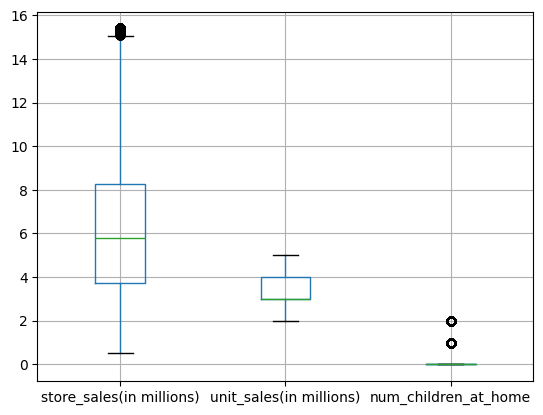

In [315]:
for col in ['store_sales(in millions)', 'unit_sales(in millions)', 'num_children_at_home']:
    train_df[col] = RemoveOutliers(train_df, col)

train_df.boxplot(['store_sales(in millions)', 'unit_sales(in millions)', 'num_children_at_home'])

Распределение данных таблицы после замены выбросов на медианы.

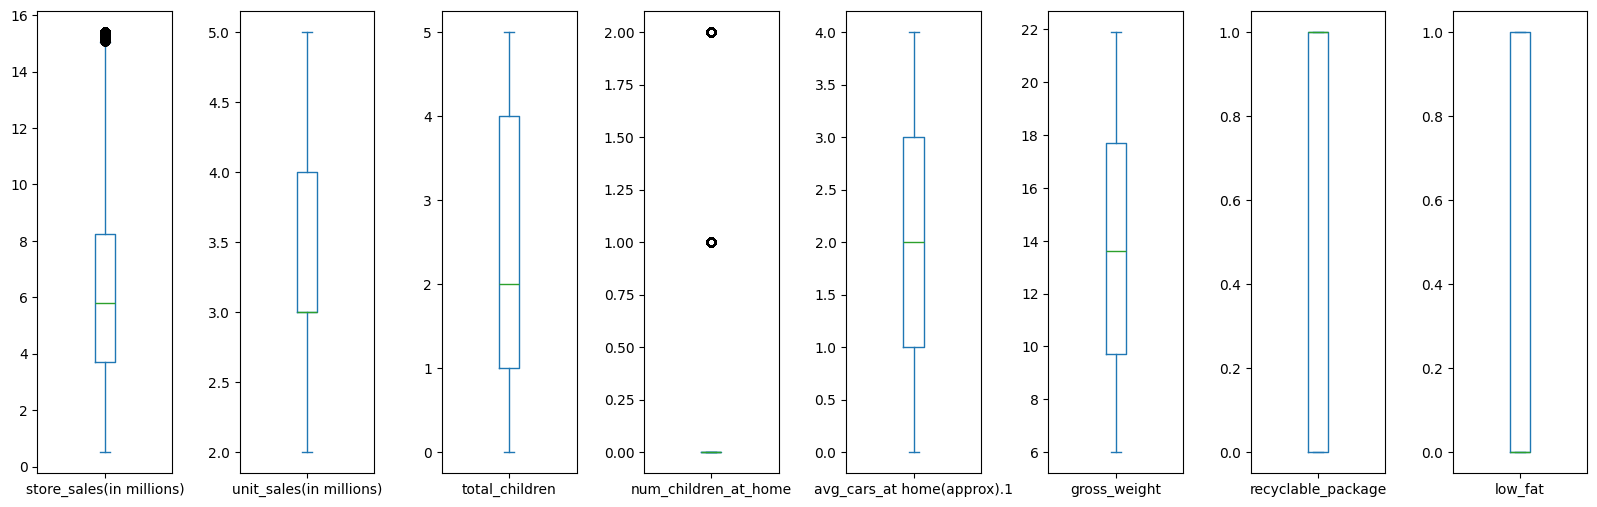

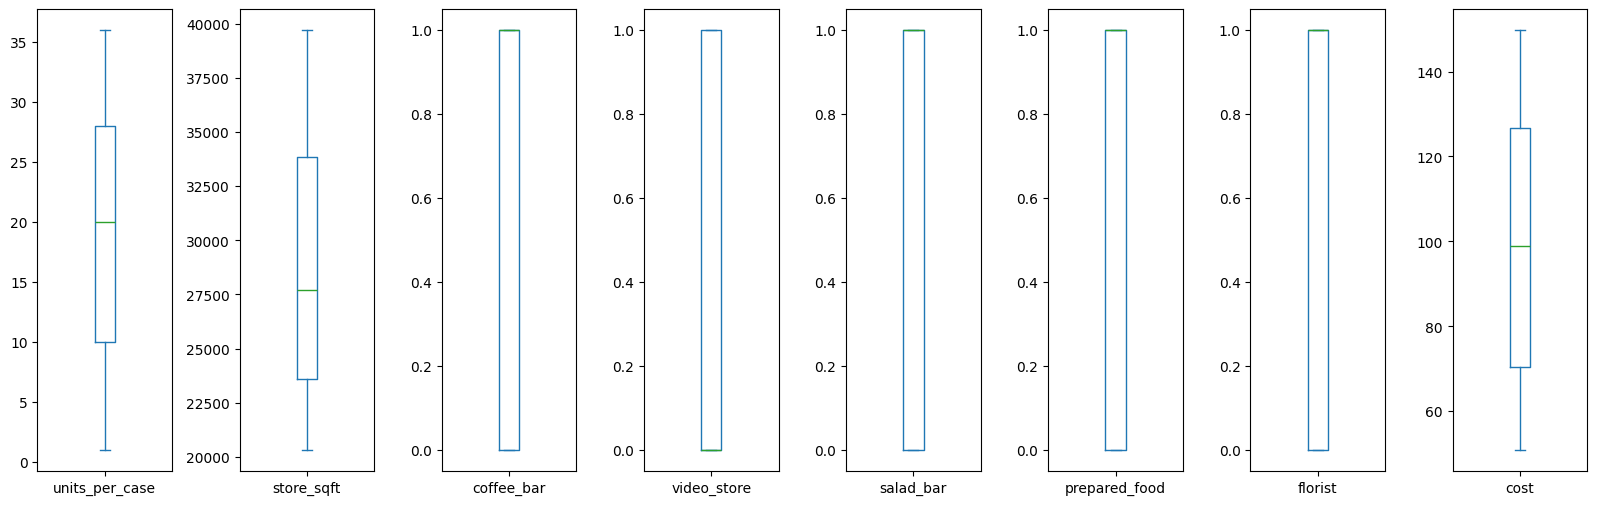

In [316]:
train_df.iloc[:,:train_df.shape[1]//2].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize= (20,6)
)
plt.subplots_adjust(wspace=0.5)
train_df.iloc[:,train_df.shape[1]//2:].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize= (20,6)
)
plt.subplots_adjust(wspace=0.5)
plt.show()

Рассчитаем матрицу корреляции

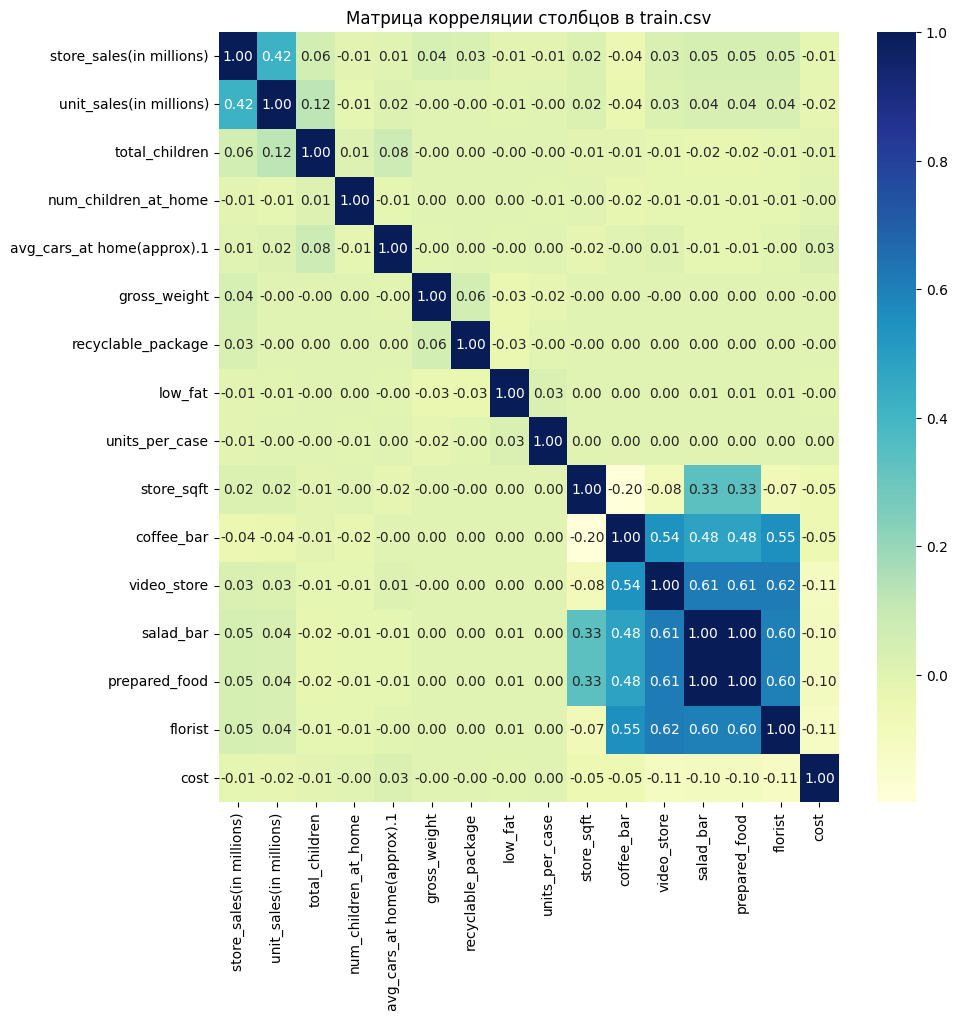

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Матрица корреляции столбцов в train.csv")
plt.show()

Есть сильная парная корреляция между prepared_food и salad_bar. При удалении prepared_food из таблицы точность модели не повысилась, поэтому оставляем все колонны.

Стандартизация датасета

In [318]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_df.drop('cost', axis=1))
scaled_features = scaler.transform(train_df.drop('cost', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = train_df.drop('cost', axis=1).columns)

Разделение датасета на обучающие и тестовые данные

In [319]:
x = scaled_data
y = train_df['cost']

In [320]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    stratify=train_df["cost"],
                                                    test_size=0.2, random_state=42)

# OLS

In [321]:
import statsmodels.api as sm

# Добавление константы к матрице признаков
X_train_st = sm.add_constant(X_train)
X_test_st = sm.add_constant(X_test)

# Создание и обучение модели линейной регрессии
model = sm.OLS(y_train, X_train_st)
results = model.fit()

# Вывод результатов регрессии
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     382.3
Date:                Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:51:46   Log-Likelihood:            -1.3861e+06
No. Observations:              288268   AIC:                         2.772e+06
Df Residuals:                  288252   BIC:                         2.772e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         99.6141      0.055   1804.027      0.000      99.506      99.722
store_sales(in millions)       0.0297      0.061      0.486      0.627      -0.090       0.149
unit_sales(in millions)       -0.3473      0.061     -5.665      0.000      -0.467      -0.227
total_children                -0.3499      0.056     -6.266      0.000      -0.459      -0.240
num_children_at_home          -0.0815      0.055     -1.476      0.140      -0.190       0.027
avg_cars_at home(approx).1     0.8110      0.055     14.633      0.000       0.702       0.920
gross_weight                  -0.0062      0.055     -0.112      0.911      -0.115       0.102
recyclable_package            -0.0149      0.055     -0.269      0.788      -0.123       0.094
low_fat                        0.0001      0.055      0.003      0.998      -0.108       0.109
units_per_case                 0.0218      0.055      0.395      0.693      -0.086       0.130
store_sqft                    -1.8008      0.069    -26.256      0.000      -1.935      -1.666
coffee_bar                     0.5639      0.074      7.637      0.000       0.419       0.709
video_store                   -2.2927      0.080    -28.482      0.000      -2.450      -2.135
salad_bar                      1.3915      2.965      0.469      0.639      -4.420       7.203
prepared_food                 -1.1083      2.965     -0.374      0.709      -6.920       4.703
florist                       -2.5086      0.079    -31.656      0.000      -2.664      -2.353
==============================================================================
Omnibus:                   260110.000   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17397.995
Skew:                           0.033   Prob(JB):                         0.00
Kurtosis:                       1.798   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Оценка качества:

In [322]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

y_train_pred = results.predict(X_train_st)
y_test_pred = results.predict(X_test_st)
print("На обучающей выборке:", "RMSE = %.4f" % root_mean_squared_error(y_train, y_train_pred), sep='\n' )
print("На тестовой выборке:")
print("RMSE = %.4f" % root_mean_squared_error(y_test, y_test_pred))
print("MSE = %.4f" % mean_squared_error(y_test, y_test_pred))
print("R^2 = %.4f" % r2_score(y_test, y_test_pred))
print("MAE = %.4f" % mean_absolute_error(y_test, y_test_pred))
OLS_error = {"RMSE":root_mean_squared_error(y_test, y_test_pred),"MSE":mean_squared_error(y_test, y_test_pred), "MAE": mean_absolute_error(y_test, y_test_pred)}

На обучающей выборке:
RMSE = 29.6457
На тестовой выборке:
RMSE = 29.6484
MSE = 879.0252
R^2 = 0.0194
MAE = 25.5790


Проверим остатки

In [323]:
residual_train = y_train_pred - y_train
residual_test = y_test_pred - y_test

np.std(residual_train), np.mean(residual_train)

(np.float64(29.64574603282211), np.float64(1.1264824069683396e-13))

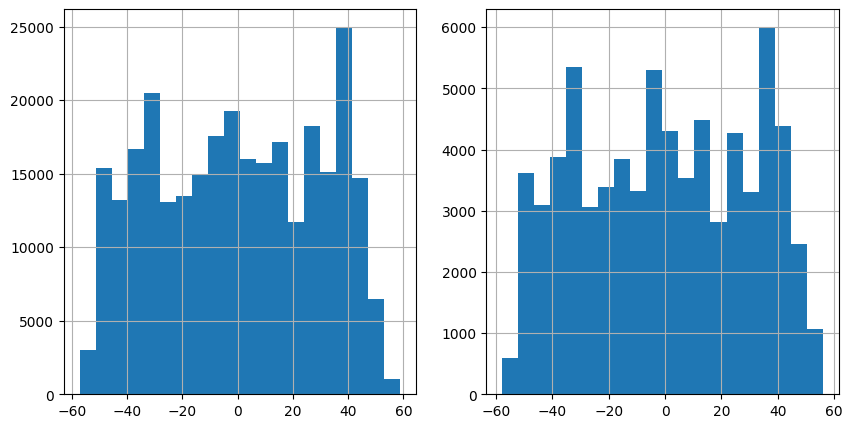

In [324]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
residual_train.hist(bins=20)
plt.subplot(1, 2, 2)
residual_test.hist(bins=20)
plt.show()

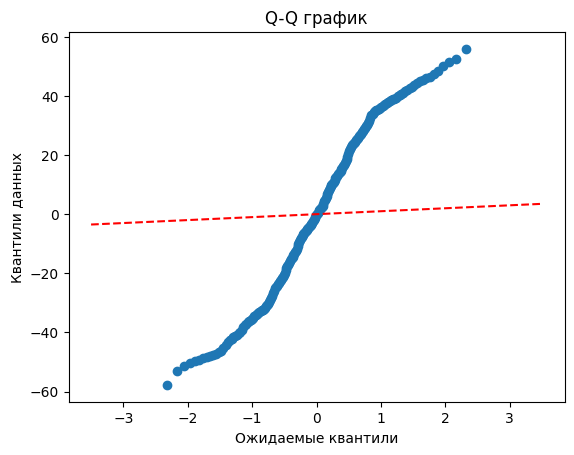

In [325]:
import scipy.stats as stats

# Вычислим квантили для данных и ожидаемые квантили нормального распределения
quantiles = np.percentile(residual_test, np.linspace(0, 100, num=200))
expected_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, num=200))

# Построим график Q-Q
plt.scatter(expected_quantiles, quantiles)
plt.plot([-3.5, 3.5], [-3.5, 3.5], color='red', linestyle='--')
plt.xlabel('Ожидаемые квантили')
plt.ylabel('Квантили данных')
plt.title('Q-Q график')
plt.show()

In [326]:
from scipy.stats import skew, kurtosis
# Рассчитаем коэффициент асимметрии и эксцесс
skewness = skew(residual_test)
kurt = kurtosis(residual_test)

print("Коэффициент асимметрии:", skewness) # левостороння ассиметрия
print("Коэффициент эксцесса:", kurt) # данные отличаются от нормального распределения и есть экстремальные значения

Коэффициент асимметрии: -0.033902101099172306
Коэффициент эксцесса: -1.2020270544302676


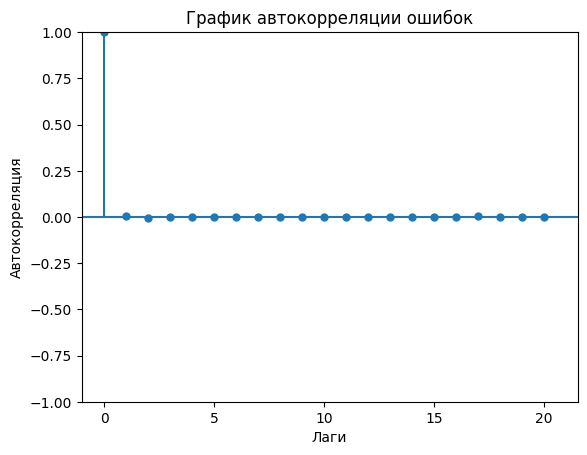

In [327]:
from statsmodels.graphics.tsaplots import plot_acf
# Построение графика автокорреляции
plot_acf(residual_train[:], lags=20)
plt.xlabel('Лаги')
plt.ylabel('Автокорреляция')
plt.title('График автокорреляции ошибок')
plt.show()

Автокорреляции в остатках нет

# LinearRegression

In [328]:
from sklearn.linear_model import LinearRegression # Импортируем класс LinearRegression из sklearn.linear_model для реализации линейной регрессии
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [329]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Оценка качества:

In [330]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("На обучающей выборке:", "RMSE = %.4f" % root_mean_squared_error(y_train, y_train_pred), sep='\n' )
print("На тестовой выборке:")
print("RMSE = %.4f" % root_mean_squared_error(y_test, y_test_pred))
print("MSE = %.4f" % mean_squared_error(y_test, y_test_pred))
print("R^2 = %.4f" % r2_score(y_test, y_test_pred))
print("MAE = %.4f" % mean_absolute_error(y_test, y_test_pred))
LinearRegression_error = {"RMSE":root_mean_squared_error(y_test, y_test_pred),"MSE":mean_squared_error(y_test, y_test_pred), "MAE": mean_absolute_error(y_test, y_test_pred)}

На обучающей выборке:
RMSE = 29.6457
На тестовой выборке:
RMSE = 29.6484
MSE = 879.0252
R^2 = 0.0194
MAE = 25.5790


# Сравнение алгоритмов

In [331]:
err_df = pd.DataFrame({"OLS":OLS_error, "LinearRegression":LinearRegression_error})
err_df

,OLS,LinearRegression
RMSE,29.65,29.65
MSE,879.03,879.03
MAE,25.58,25.58


Оба алгоритма имеют одинаковый уровень качества. 

В нашем случае выбираем LinearRegression

# Коэфицены LinearRegression и веса

In [332]:
print("Коэфиценты из LinearRegression: ",  model.coef_, sep='\n')

Коэфиценты из LinearRegression: 
[ 2.96680343e-02 -3.47330377e-01 -3.49939975e-01 -8.14811602e-02
  8.10953238e-01 -6.20058661e-03 -1.48828026e-02  1.47325065e-04
  2.18037985e-02 -1.80084366e+00  5.63869659e-01 -2.29270082e+00
  1.39149003e+00 -1.10834134e+00 -2.50855125e+00]


In [333]:
def show_weights(features, weights, means, scales):
    fig, axs = plt.subplots(figsize=(12, 6), ncols=3)
    sorted_weights = sorted(zip(weights, features, means, scales), reverse=True)
    weights, features, means, scales = zip(*sorted_weights)
    features = list(features)

    sns.barplot(y=features, x=list(weights), ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=list(means), ax=axs[1])
    axs[1].set_xlabel("Mean")
    sns.barplot(y=features, x=list(scales), ax=axs[2])
    axs[2].set_xlabel("Scale")
    plt.tight_layout()

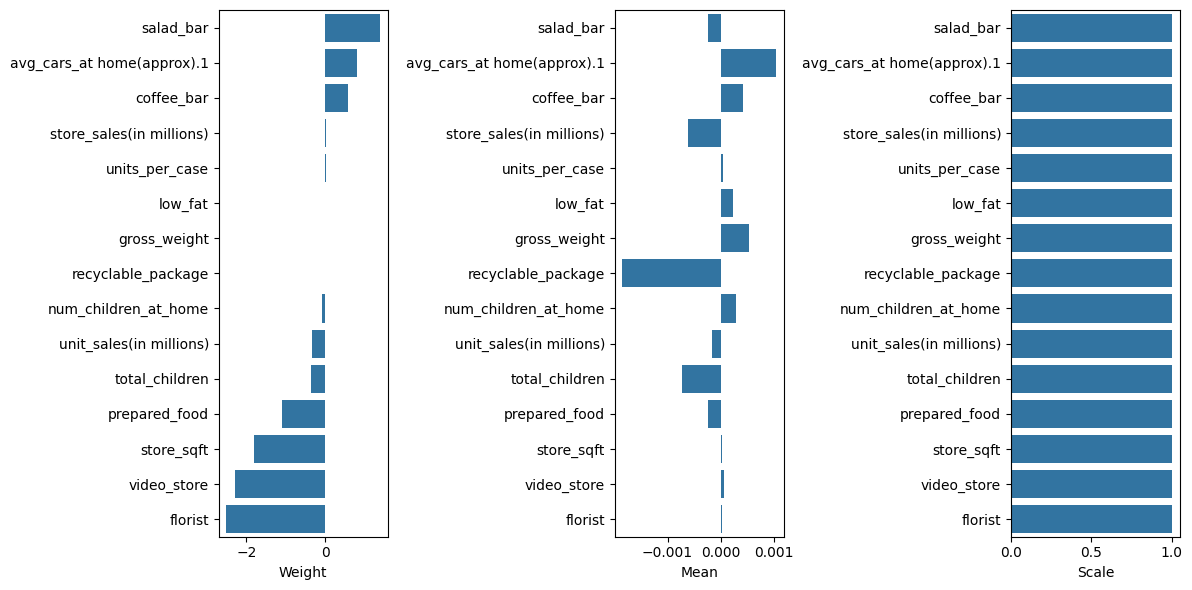

In [334]:
show_weights(X_train.columns, model.coef_, X_train.mean(), X_train.std())

Вывод:

На cost больше всего влияют столбцы florist, video_store, store_sqft, salad_bar.

Первые три имеют отрицательное влияние на целевую переменную, а последний - положительное.